In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('housing_data.csv',index_col=0) #index_col to remove index number, pandas automatically creates index

In [4]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [5]:
data.shape

(1460, 80)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
data.isnull().sum().any()

True

In [7]:
# check columns for null values
data.isnull().sum()[data.isnull().sum()>0]

Electrical      1
GarageYrBlt    81
dtype: int64

In [9]:
# create Numerical features 
df_num=data.select_dtypes(exclude='object')
print(df_num.shape)

(1460, 35)


In [10]:
# give list
list_num=df_num.columns.tolist()
list_num

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

In [11]:
# create object features 
df_obj=data.select_dtypes(include='object')

In [12]:
# give list 
list_obj=df_obj.columns.tolist()

In [11]:
list_obj

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'SaleType',
 'SaleCondition']

### Analysis
-> Univariate Analysis- one variable, can be used for numerical and also categorical data

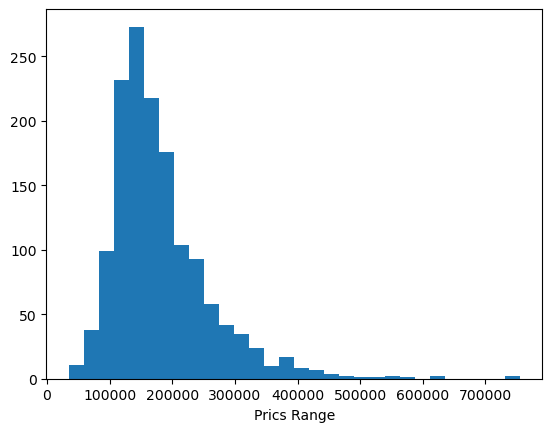

In [13]:
#Histogram for Univariate Analysis- visualize data distribution in fprm of bins
plt.hist(data['SalePrice'],bins=30) #bins= how many class intervals required
plt.xlabel('Prics Range') #Naming for x-axis
plt.show()

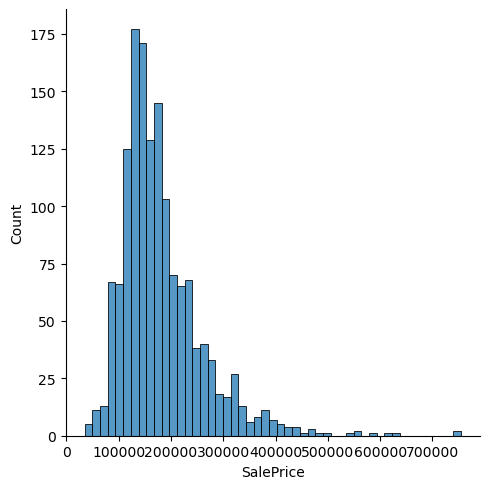

In [14]:
sns.displot(data['SalePrice'])
plt.show()

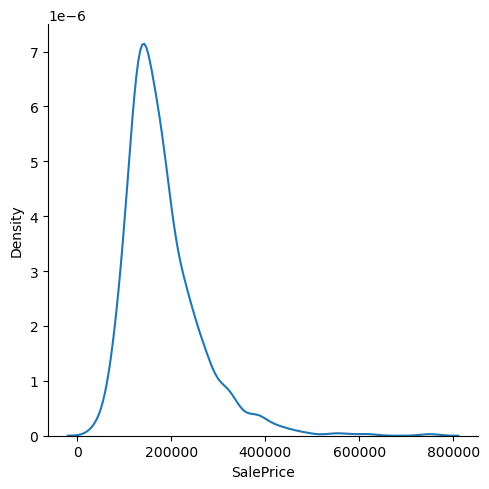

In [18]:
sns.displot(data['SalePrice'],kind="kde") # kernel density estimate
plt.show()

<Figure size 1000x1500 with 0 Axes>

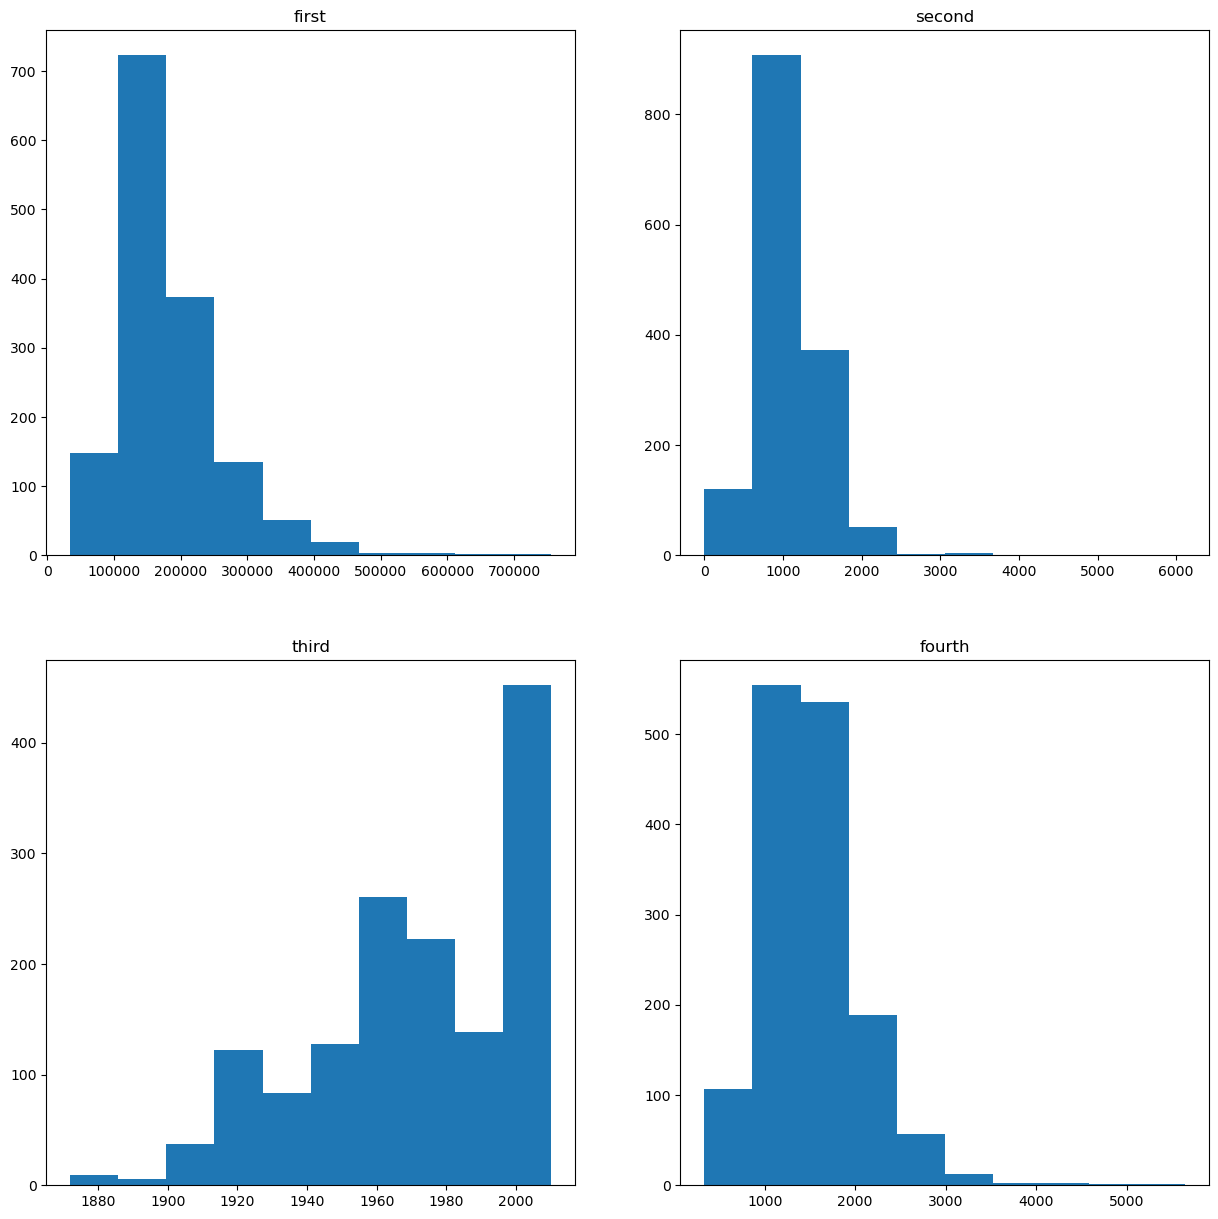

In [17]:
#subplot for multiple plots for one input
plt.figure(figsize=(10,15))
plt.subplots_adjust(hspace=0.5,wspace=0.8)
plt.figure(figsize=(15,15))

plt.subplot(2,2,1) #2 rows 2 col 321
plt.hist(data['SalePrice']) # kernel denstity estimate
plt.title('first')

plt.subplot(2,2,2)
plt.hist(data['TotalBsmtSF'])
plt.title('second')

plt.subplot(2,2,3)
plt.hist(data['YearBuilt'])
plt.title('third')

plt.subplot(2,2,4)
plt.hist(data['GrLivArea'])
plt.title('fourth')
plt.show()

In [20]:
sns.boxplot(x=data['SalePrice'],data=data

SyntaxError: unexpected EOF while parsing (2056972838.py, line 1)

<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

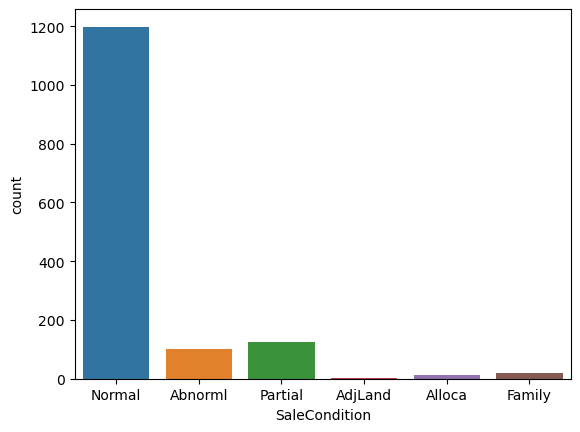

In [21]:
# for categorical variable
# count 
sns.countplot(x=data['SaleCondition'])

<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

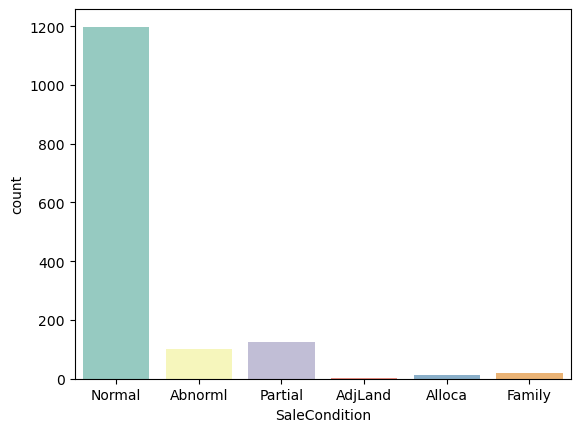

In [22]:
sns.countplot(x=data['SaleCondition'],palette="Set3")

<AxesSubplot:xlabel='count', ylabel='Neighborhood'>

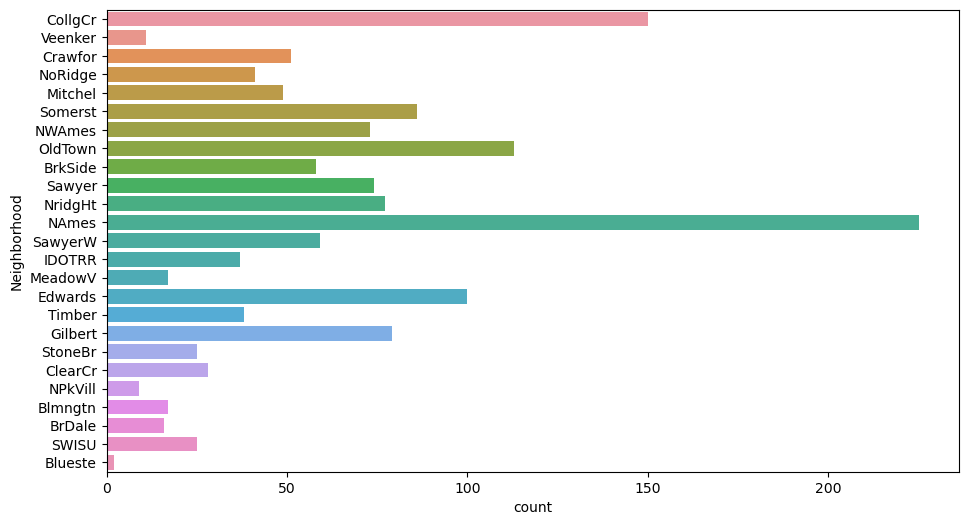

In [23]:
# count 
plt.figure(figsize=(11,6))
sns.countplot(y=data['Neighborhood'])

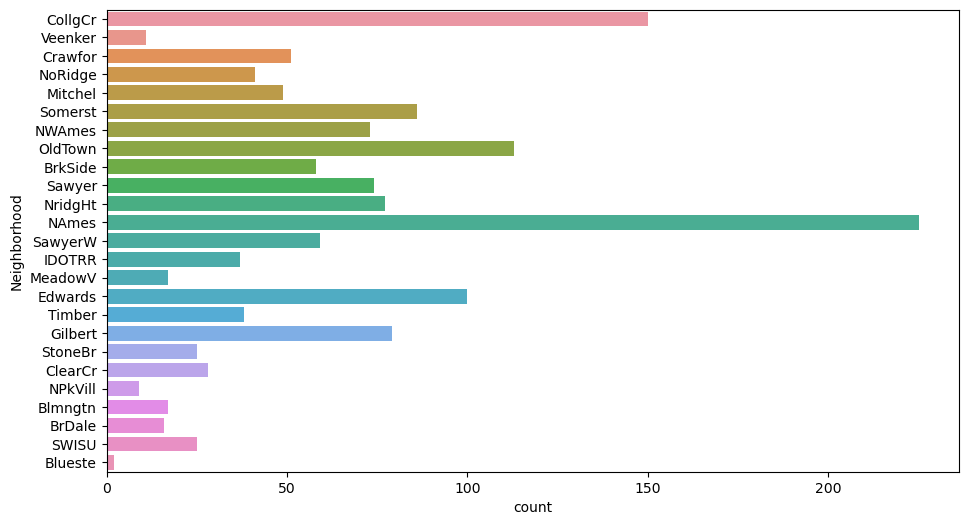

In [24]:
# count 
plt.figure(figsize=(11,6))
sns.countplot(y=data['Neighborhood'])
plt.show()

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

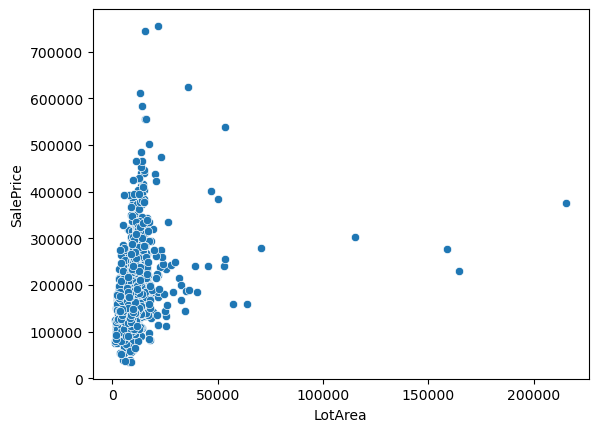

In [25]:
# numeric vs numeric
sns.scatterplot(x='LotArea',y='SalePrice',data=data)

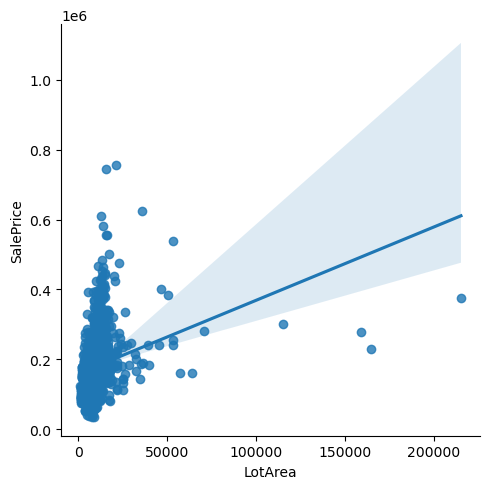

In [26]:
sns.lmplot(x='LotArea',y='SalePrice',data=data)

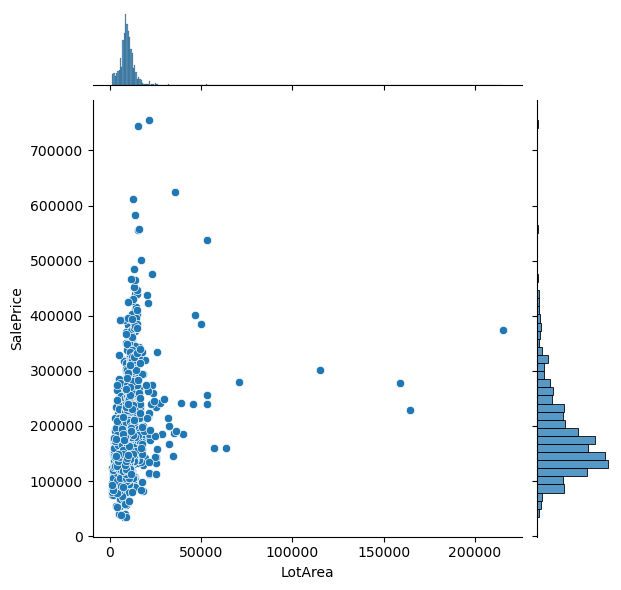

In [27]:
sns.jointplot(x='LotArea',y='SalePrice',data=data)

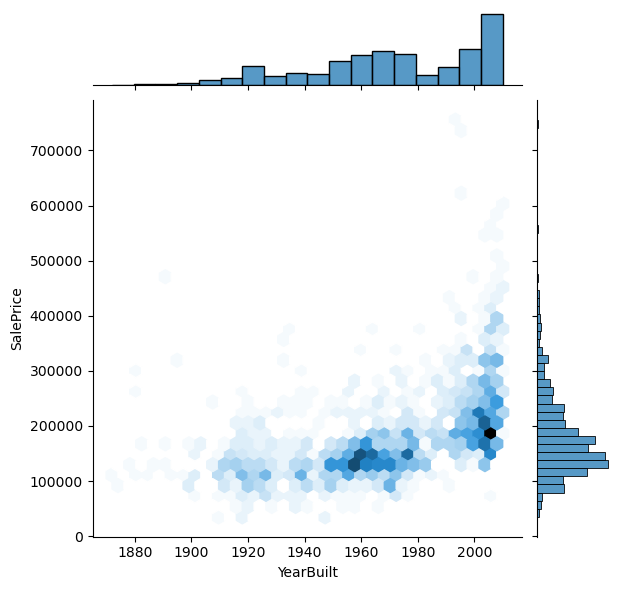

In [28]:
sns.jointplot(x='YearBuilt',y='SalePrice',data=data,kind='hex')

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

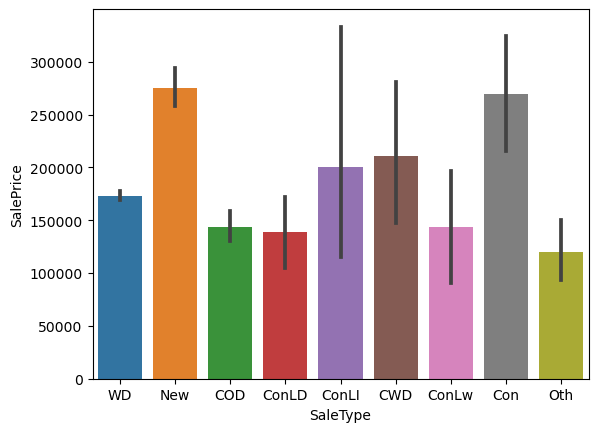

In [29]:
# Catgorical vs numerical
sns.barplot(x='SaleType',y='SalePrice',data=data)

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

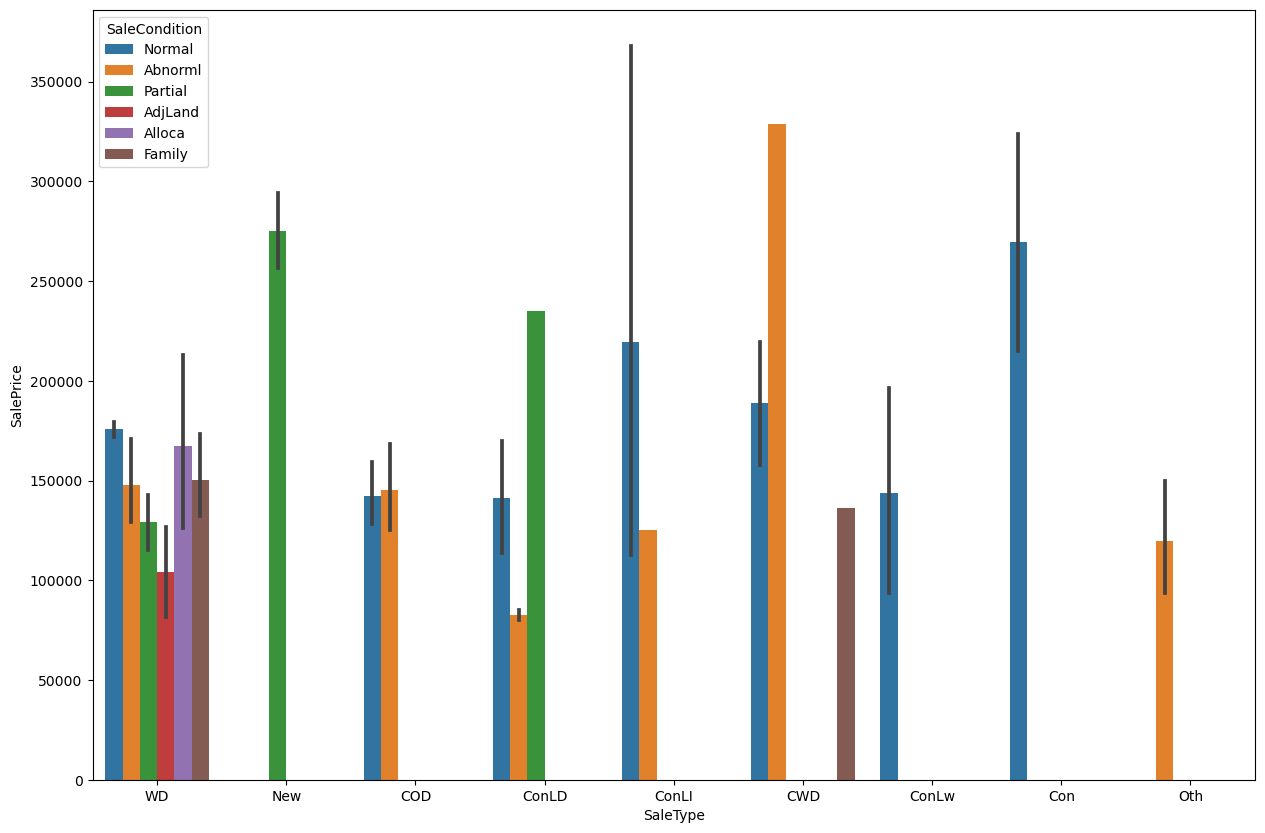

In [30]:
# Catgorical vs numerical
plt.figure(figsize=(15,10))
sns.barplot(x='SaleType',y='SalePrice',data=data,hue='SaleCondition')

In [31]:
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x00000231E2C06040>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
    Show point estimates and confidence intervals as rectangular bars.
    
    A bar plot represents an estimate of central tendency for a numeric
    variable with the height of each rectangle and provides some indication of
    the uncertainty around that estimate using error bars. Bar plots include 0
    in the quantitative axis range, and they are a good choice when 0 is a
    meaningful value for the quantitative variable, and you want to make
    comparisons against it.
    
    For datasets where 0 is not a meaningful value, a point plot will allow you
    to focus on differences between levels of one or more categorical
    va

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

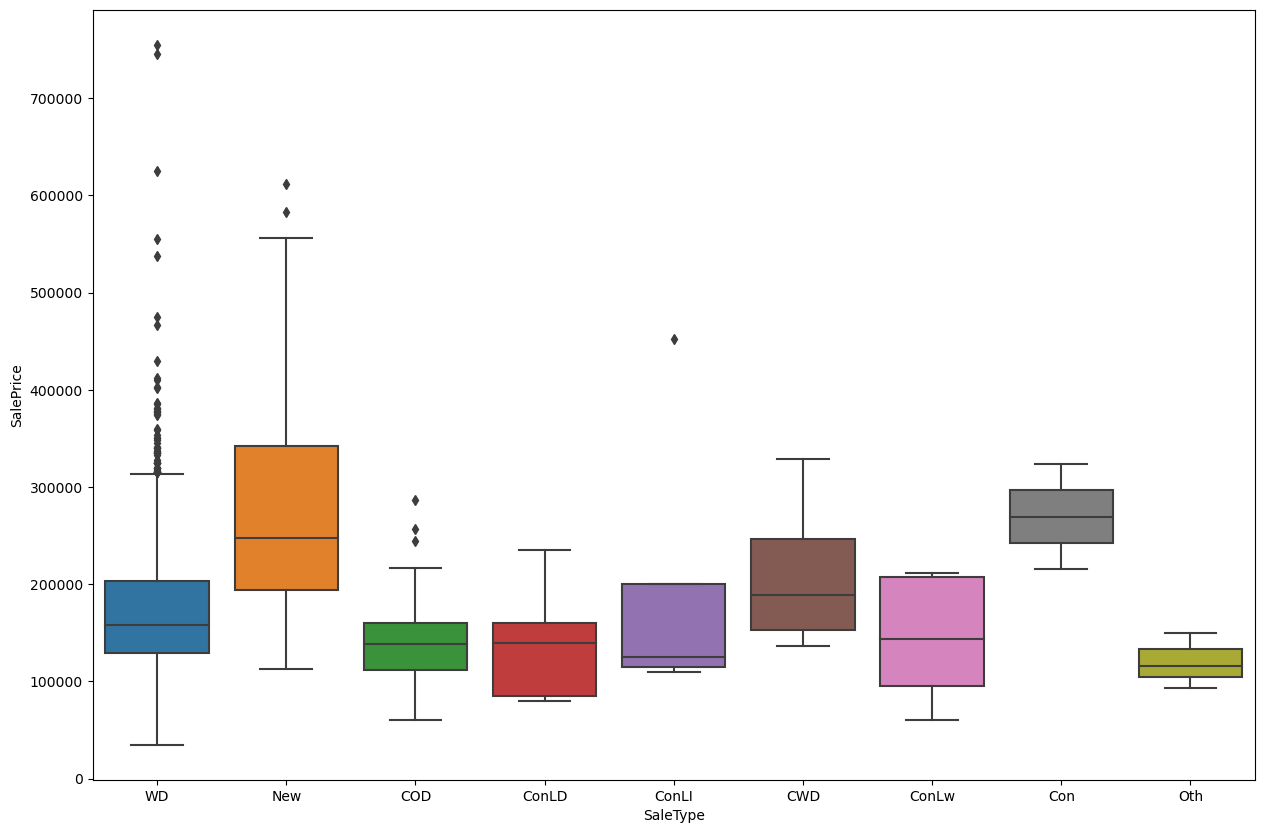

In [32]:
# numeric vs categorical
plt.figure(figsize=(15,10))
sns.boxplot(x='SaleType',y='SalePrice',data=data)

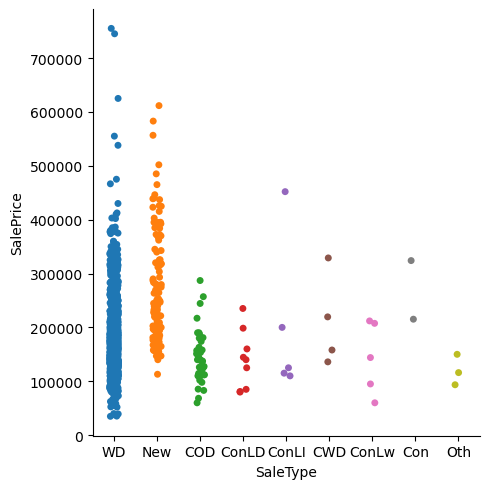

In [33]:
sns.catplot(x='SaleType',y='SalePrice',data=data)

In [34]:
# categorical vs categorical
crosstab=pd.crosstab(index=data['Neighborhood'],columns=data['SaleCondition'])
crosstab

SaleCondition,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Neighborhood,,,,,,
Blmngtn,0,0,0,0,12,5
Blueste,0,0,0,0,2,0
BrDale,3,0,0,1,12,0
BrkSide,3,0,0,1,54,0
ClearCr,3,0,0,0,24,1
CollgCr,3,0,0,0,129,18
Crawfor,3,0,2,2,43,1
Edwards,8,4,2,0,82,4
Gilbert,1,0,0,2,64,12


<AxesSubplot:xlabel='Neighborhood'>

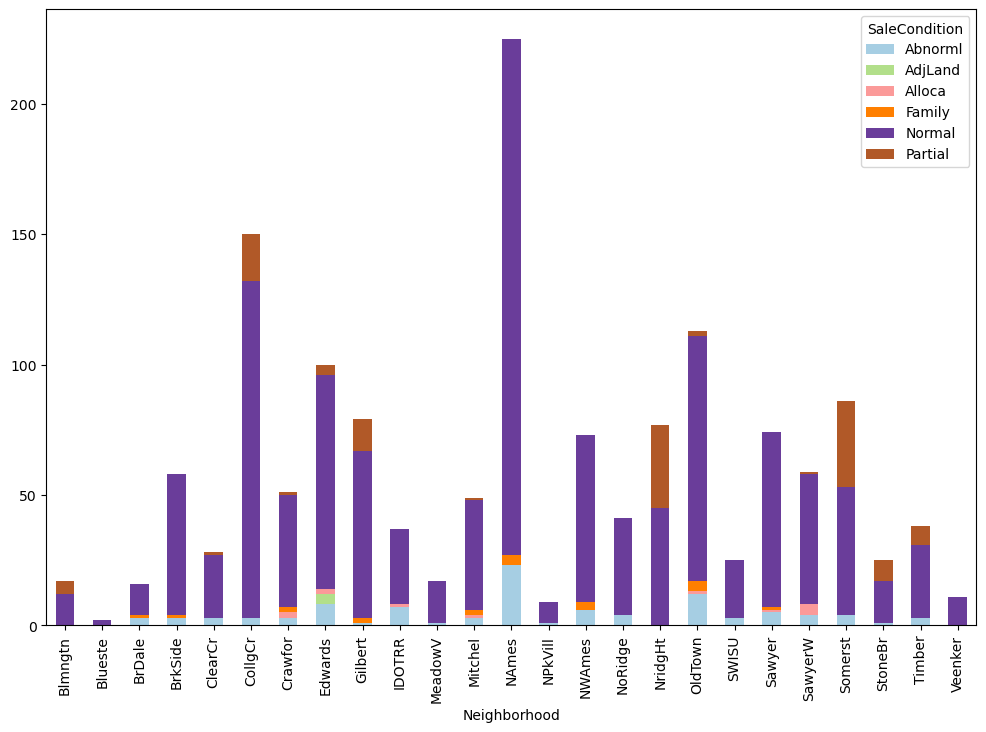

In [35]:
crosstab.plot(kind='bar',figsize=(12,8),stacked=True,colormap='Paired')

<AxesSubplot:>

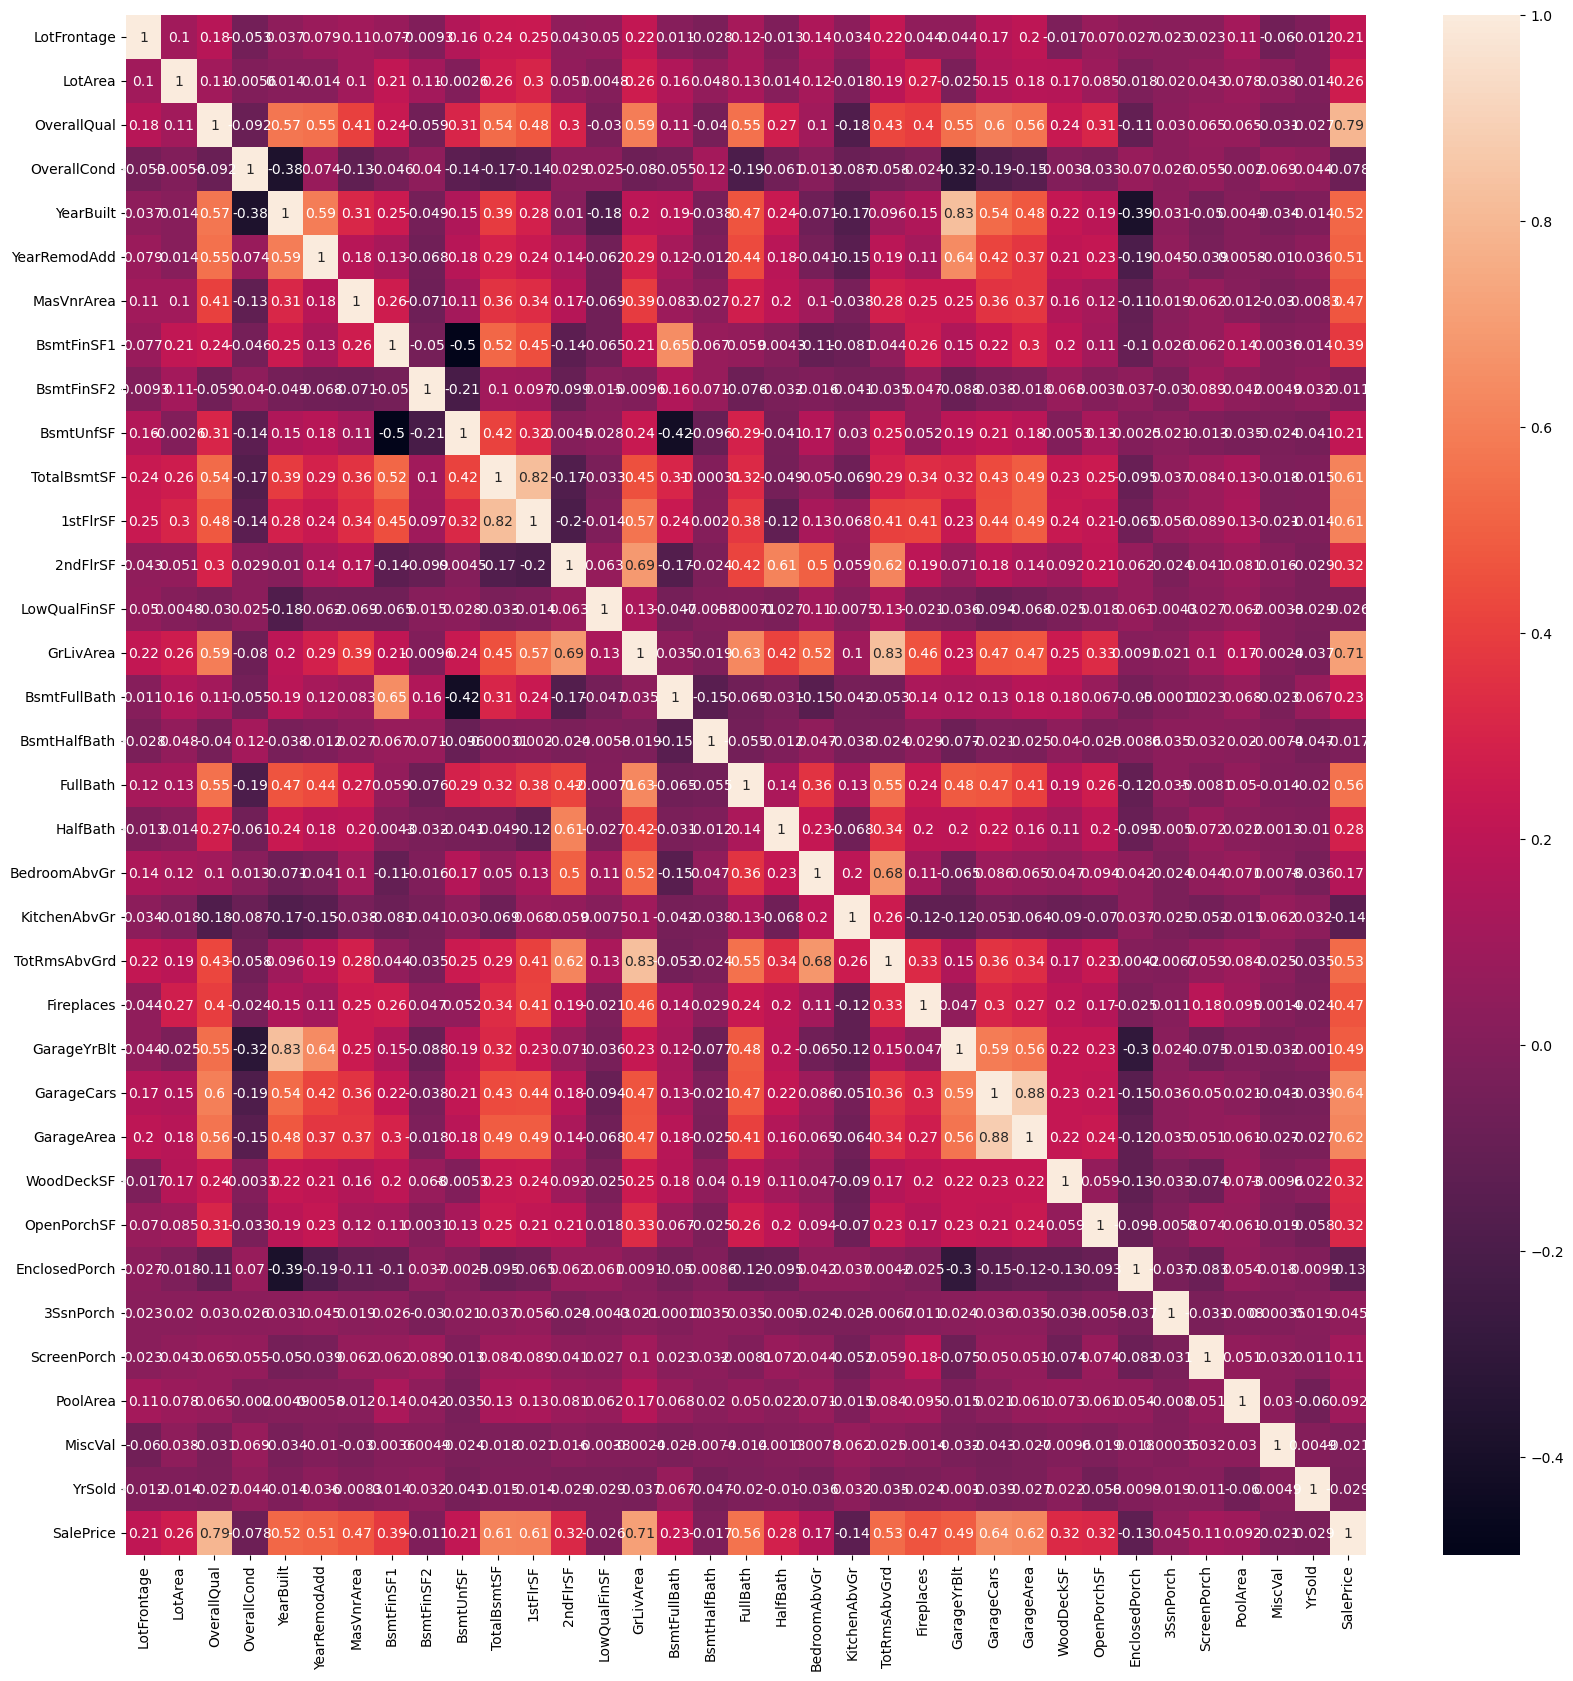

In [36]:
# Multivariate Analysis
plt.figure(figsize=(20,20))
sns.heatmap(df_num.corr(),annot=True)